In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
import glob
import pickle
from scipy.stats import norm

In [3]:
file_lst = glob.glob('/data/pbl/data/pkl/*.pkl')

In [88]:
bb_len_mean = []
bb_len_std = []
labels = []

total_bb = 0
malware_bb = 0
normal_bb = 0

for filename in file_lst:
    with open(filename, 'rb') as f:
        data = pickle.load(f)
        
    labels.append(data['type'])
    bb_lengths = np.array([len(bb) for bb in data['bbs']])
    
    bb_len_mean.append(bb_lengths.mean())
    bb_len_std.append(bb_lengths.std())
    
    total_bb += len(data['bbs'])
    if data['type'] == 0:
        normal_bb += len(data['bbs'])
    else:
        malware_bb += len(data['bbs'])

In [89]:
total_bb, normal_bb, malware_bb

(49717320, 19674011, 30043309)

In [26]:
bb_len_mean = np.array(bb_len_mean)
bb_len_std = np.array(bb_len_std)
labels = np.array(labels)

In [74]:
normal_bb_len_mean = bb_len_mean[np.where(labels == 0)]
normal_bb_len_std = bb_len_mean[np.where(labels == 0)]

Text(0.5, 0, 'bb length mean')

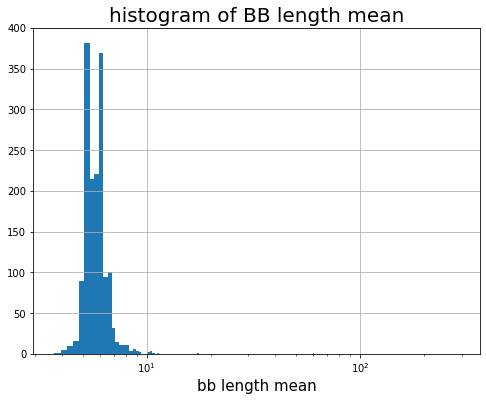

In [93]:
plt.figure(figsize=(8, 6))
plt.hist(normal_bb_len_mean, bins=1000)
plt.xscale('log')
plt.grid()
plt.title('histogram of BB length mean', fontsize=20)
plt.xlabel('bb length mean', fontsize=15)

Text(0.5, 0, 'bb length std.')

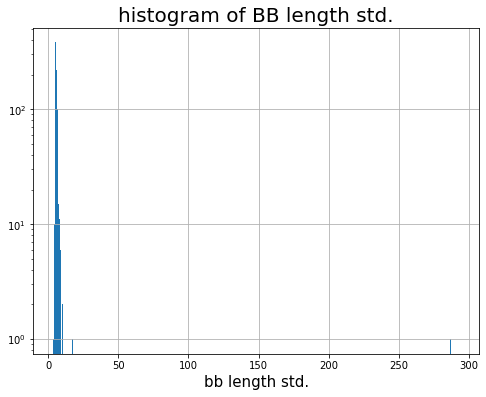

In [94]:
plt.figure(figsize=(8, 6))
plt.hist(normal_bb_len_std, bins=1000)
plt.yscale('log')
plt.grid()
plt.title('histogram of BB length std.', fontsize=20)
plt.xlabel('bb length std.', fontsize=15)

In [78]:
std_mu, std_std = normal_bb_len_std.mean(), normal_bb_len_std.std()

In [79]:
mean_mu, mean_std = normal_bb_len_mean.mean(), normal_bb_len_mean.std()

In [80]:
def cal_prob(mean, std):
    mean_zscore = (mean - mean_mu) / mean_std
    std_zscore = (std - std_mu) / std_std
    return 2 * (1 - norm.cdf(abs(mean_zscore))) * 2 * (1 - norm.cdf(abs(std_zscore)))

In [81]:
score_normal = []
score_malware = []

for mean, std, label in zip(bb_len_mean, bb_len_std, labels):
    score = cal_prob(mean, std)
    if label == 0:
        score_normal.append(score)
    else:
        score_malware.append(score)
        
score_normal = np.array(score_normal)
score_malware = np.array(score_malware)

Text(0.5, 0, 'score')

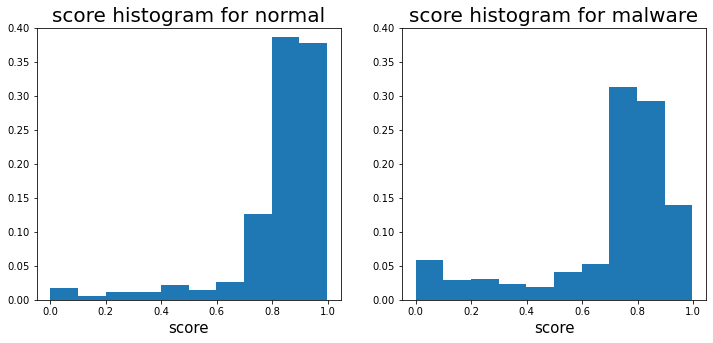

In [100]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.ylim(0, 0.4)
plt.hist(score_normal, weights=np.ones(len(score_normal)) / len(score_normal))
plt.title('score histogram for normal', fontsize=20)
plt.xlabel('score', fontsize=15)

plt.subplot(1, 2, 2)
plt.ylim(0, 0.4)
plt.hist(score_malware, weights=np.ones(len(score_malware)) / len(score_malware))
plt.title('score histogram for malware', fontsize=20)
plt.xlabel('score', fontsize=15)

In [71]:
JUMP_INSTS = {
    'jo',
    'jno',
    'js',
    'jns',
    'je',
    'jz',
    'jne',
    'jze',
    'jb',
    'jnae',
    'jc',
    'jnb',
    'jae',
    'jnc',
    'jbe',
    'jna',
    'ja',
    'jnbe',
    'jl',
    'jnge',
    'jge',
    'jnl',
    'jle',
    'jng',
    'jg',
    'jnle',
    'jp',
    'jpe',
    'jnp',
    'jpo',
    'jcxz',
    'jecxz',
    'call',
    'ret',
    'retf',
    'retfw',
    'retn',
    'retnw'
}
print(' '.join(JUMP_INSTS))

ja call jnc jcxz jng jno jpo jp retfw jl retn jns jnle retnw jbe jnae jle jnp jnb jnl jge je jae jnge jz jo jpe js jg jne jnbe jb jecxz jc retf jna jze ret


In [73]:
np.sum(labels == 0), np.sum(labels == 1)

(1610, 2696)